In [38]:
# %pip install seaborn
# %pip install matplotlib
# %pip install pandas
# %pip install numpy
# %pip install scipy

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [40]:
################## Polluted Days ######################

In [41]:
df1 = pd.read_csv("data/Parameters/pm2.5/2023-01-02.csv")
df2 = pd.read_csv("data/Parameters/pm2.5/2023-01-29.csv")
df3 = pd.read_csv("data/Parameters/pm2.5/2023-01-24.csv")

df1.x1 = df1.x1*60
df2.x1 = df2.x1*60
df3.x1 = df3.x1*60

In [42]:
def peak_val(data):
    # Remove pairs where x >= 90
    filtered_list = [[x, y] for x, y in data if x < 90]

    # print(filtered_list)
    data = filtered_list
    # Find the (x, y) pair with the maximum y value
    max_y_pair = max(data, key=lambda pair: pair[1])
    
    print(f"The (x, y) pair with the maximum y value is: {max_y_pair}")
    return max_y_pair

The (x, y) pair with the maximum y value is: [12.95303940498128, 2567.7376547724243]


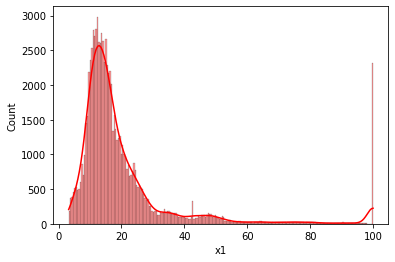

In [43]:
# Plot the probability density functions using kernel density estimates (KDE)
ax1 = sns.histplot(data=df1, x='x1',alpha = 0.4,  kde = True, color ="r", label='Most Polluted (02/01/2023)')
data_1 =  ax1.lines[0].get_xydata()
peak_1 = peak_val(data_1)[0]

The (x, y) pair with the maximum y value is: [15.225333326300218, 3534.3275939832342]


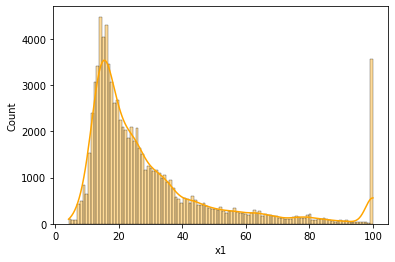

In [44]:
ax2 = sns.histplot(data=df2, x='x1', alpha = 0.4, kde = True, color ="orange", label='Intermediate Polluted (28/01/2023)')
data_2 = ax2.lines[0].get_xydata()
peak_2 = peak_val(data_2)[0]

The (x, y) pair with the maximum y value is: [18.691147348774727, 2619.138025198208]


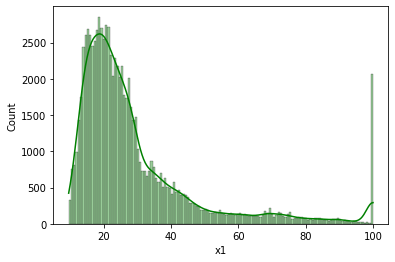

In [45]:
ax3 = sns.histplot(data=df3, x='x1', alpha = 0.4, kde = True,color ="g", label='Least Polluted (12/01/2023)')
data_3 = ax3.lines[0].get_xydata()
peak_3 = peak_val(data_3)[0]

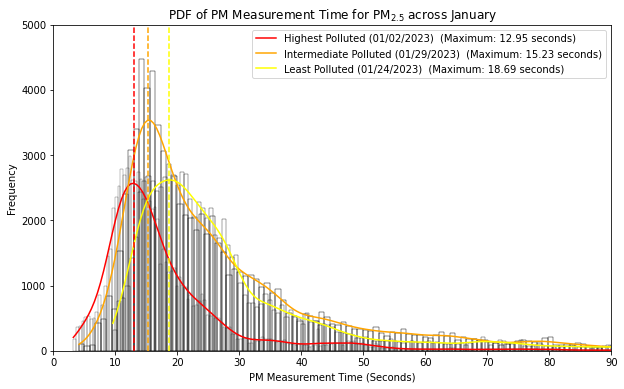

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x='x1',alpha = 0.0,  kde = True, color ="red", label='Highest Polluted (02/01/2023)')
sns.histplot(data=df2, x='x1', alpha = 0.0, kde = True, color ="orange", label='Intermediate Polluted (28/01/2023)')
sns.histplot(data=df3, x='x1', alpha = 0.0, kde = True,color ="yellow", label='Least Polluted (24/01/2023)')



plt.xlim(0, 90)
plt.ylim(0, 5000)
plt.xlabel('PM Measurement Time (Seconds)')
plt.ylabel('Frequency')
plt.title('PDF of PM Measurement Time for PM$_{2.5}$ across January')
plt.legend()

plt.axvline(peak_1, color='red', linestyle='dashed',)
plt.axvline(peak_2, color='orange', linestyle='dashed')
plt.axvline(peak_3, color='yellow', linestyle='dashed')

legend_labels = ['Highest Polluted (01/02/2023)', 'Intermediate Polluted (01/29/2023)', 'Least Polluted (01/24/2023)']
for i, peak_value in enumerate([peak_1, peak_2, peak_3]):
    legend_labels[i] += f'  (Maximum: {round(peak_value, 2)} seconds)'

# Update legend with custom labels
plt.legend(labels=legend_labels)
plt.savefig(r"D:\UTD\UTDFall2023\Temporal_Variograms\firmware\plots\Polluted_Day_with_peak_times.png")
plt.show()
plt.show()

In [47]:
from scipy.stats import gaussian_kde

def find_kde_peak(data, bw_adjust=0.5):
    """
    Find the peak of a KDE plot for given data and bandwidth adjustment.
    """
    # Calculate KDE with Scipy, adjusting the bandwidth similarly to Seaborn's approach
    kde = gaussian_kde(data)
    kde.set_bandwidth(bw_method=kde.factor * bw_adjust)  # Adjust the bandwidth
    
    x_range = np.linspace(0, 90, 1000)  # Use a finer x_range for more precision
    kde_values = kde.evaluate(x_range)
    
    # Find the peak
    peak_idx = np.argmax(kde_values)
    peak_x = x_range[peak_idx]
    return peak_x

# Calculate peaks for each dataset with the specified bw_adjust
peak_1 = find_kde_peak(df1['x1'], bw_adjust=0.5)
peak_2 = find_kde_peak(df2['x1'], bw_adjust=0.5)
peak_3 = find_kde_peak(df3['x1'], bw_adjust=0.5)

peak_1, peak_2, peak_3


(12.252252252252251, 15.045045045045045, 18.91891891891892)

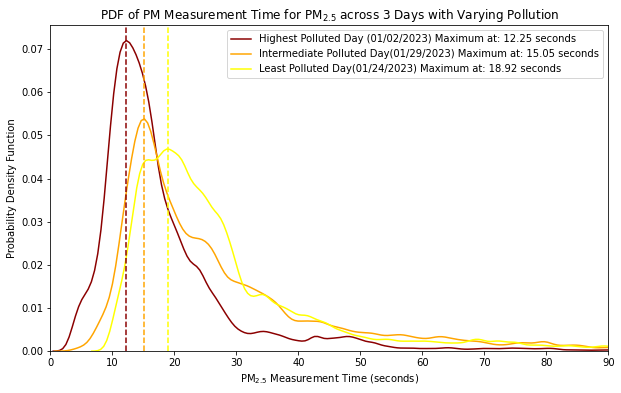

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming df1, df2, df3, and peak_1, peak_2, peak_3 are predefined variables

plt.figure(figsize=(10, 6))

# Calculate the scale factor (number of observations)
# scale_df1 = len(df1['x1'])
# scale_df2 = len(df2['x1'])
# scale_df3 = len(df3['x1'])

# Adjusted KDE plots
sns.kdeplot(data=df1, x='x1', color="darkred", bw_adjust=0.5, label=f'Highest Polluted Day (01/02/2023) Maximum at: {round(peak_1, 2)} seconds')
sns.kdeplot(data=df2, x='x1', color="orange", bw_adjust=0.5, label= f'Intermediate Polluted Day(01/29/2023) Maximum at: {round(peak_2,2)} seconds')
sns.kdeplot(data=df3, x='x1', color="yellow", bw_adjust=0.5, label= f'Least Polluted Day(01/24/2023) Maximum at: {round(peak_3, 2)} seconds')
# print(plt.gca().get_yticks())
# print(np.round(plt.gca().get_yticks() * scale_df1, 0))
# Scale the y-axis by the number of observations to approximate frequency
# plt.gca().set_yticklabels(np.round(plt.gca().get_yticks() * scale_df1, 0))

plt.xlim(0, 90)
plt.ylim(0, plt.ylim()[1])
plt.xlabel('PM$_{2.5}$ Measurement Time (seconds)')
plt.ylabel('Probability Density Function')
plt.title('PDF of PM Measurement Time for PM$_{2.5}$ across 3 Days with Varying Pollution')

# Vertical lines for peak values
plt.axvline(peak_1, color='darkred', linestyle='dashed')
plt.axvline(peak_2, color='orange', linestyle='dashed')
plt.axvline(peak_3, color='yellow', linestyle='dashed')

# Update the legend to include peak information
plt.legend()

# Save the figure
plt.savefig(r"D:\UTD\UTDFall2023\Temporal_Variograms\firmware\plots\Polluted_Day_with_peak_times_pdf.png")

# Display the plot
plt.show()
